# Análise exploratória dos dados

In [1]:
import json
import tqdm

In [2]:
def normalize_count(path, output_name):
    with open(path, 'r') as f:
        data = json.load(f)
        new_dict = {}
        for k in list(range(0, 276)):
            str_key = str(k)
            formatted_key = '{}-{}'.format(str((k * 100)).zfill(6), str(((k * 100) + 99)).zfill(6))
            if str_key in data.keys():
                new_dict[formatted_key] = data[str_key]
            else:
                new_dict[formatted_key] = 0
    with open(output_name, 'w') as w:
        write_data = json.dumps(new_dict)
        w.write(write_data)
    
    return new_dict

In [3]:
count_2010 = normalize_count('data/len_count/2010_count.json', 'data/normalized_len_count/2010_count.json')
count_2011 = normalize_count('data/len_count/2011_count.json', 'data/normalized_len_count/2011_count.json')
count_2012 = normalize_count('data/len_count/2012_count.json', 'data/normalized_len_count/2012_count.json')
count_2013 = normalize_count('data/len_count/2013_count.json', 'data/normalized_len_count/2013_count.json')
count_2014 = normalize_count('data/len_count/2014_count.json', 'data/normalized_len_count/2014_count.json')
count_2016 = normalize_count('data/len_count/2016_count.json', 'data/normalized_len_count/2016_count.json')

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
years = [
    ('2010', count_2010),
    ('2011', count_2011),
    ('2012', count_2012),
    ('2013', count_2013),
    ('2014', count_2014),
    ('2016', count_2016)
]

In [6]:
def create_df(array):
    to_df = {
        'len': [],
        'quant': [],
        'year': []
    }
    for obj in array:
        to_df['len'] += list(obj[1].keys())
        to_df['quant'] += list(obj[1].values())
        to_df['year'] += [obj[0]] * len(obj[1])
    df = pd.DataFrame.from_dict(to_df)
    return df

In [7]:
all_count = create_df(years)

In [8]:
import re

def remove_zeros(x):
    x = re.sub(r'^[0-9]0?0?0?0?', '', x)
    x = re.sub(r'-0?0?0?0?', '-', x)
    return x

In [118]:
def generate_year_graph(df):
    sns.set(style='whitegrid')
    chart = sns.catplot(x='Tamanho dos acórdãos em caracteres', y='Quantidade', hue='Ano', data=df[:239], kind='bar')
    chart.fig.set_size_inches(20, 8)
    for ax in chart.axes.ravel():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    chart.savefig('catplot.png', format='png', dpi=150, bbox_inches='tight')

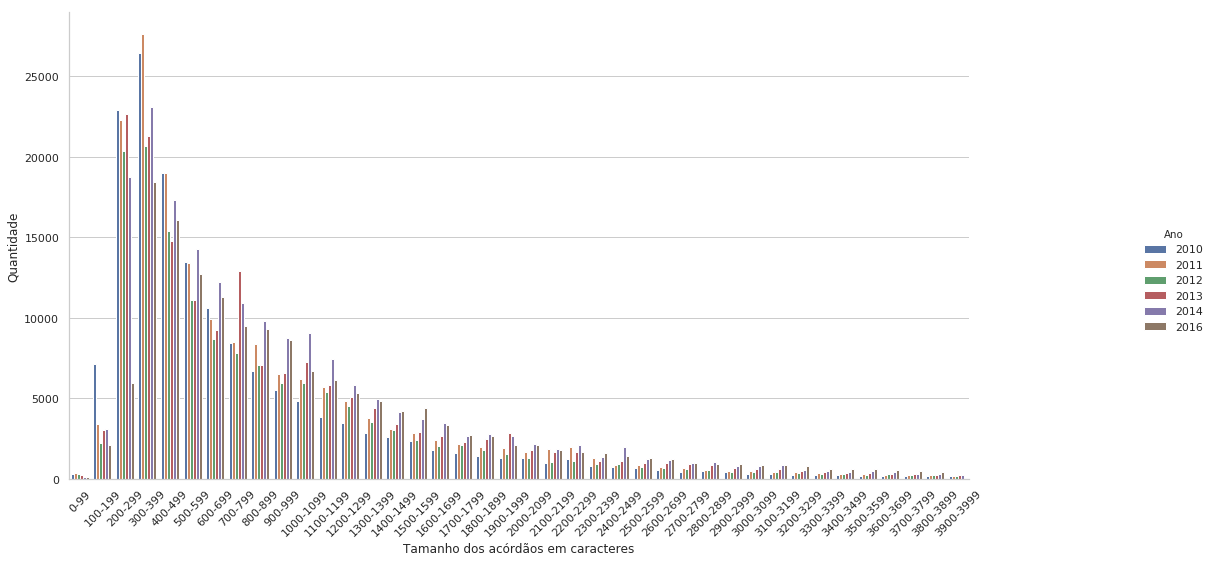

In [119]:
sorted_count = all_count.sort_values(by=['len'])
sorted_count['len'] = sorted_count['len'].apply(lambda x: remove_zeros(x))
sorted_count = sorted_count.rename(columns={'len': 'Tamanho dos acórdãos em caracteres', 'quant': 'Quantidade', 'year': 'Ano'})
generate_year_graph(sorted_count)

In [11]:
all_years_count = {}
for y in years:
    for k in y[1].keys():
        if k in all_years_count.keys():
            all_years_count[k] += y[1][k]
        else:
            all_years_count[k] = y[1][k]

In [12]:
def generate_count_graph(len_count):
    to_df = { 'Tamanho dos acórdãos em caracteres': list(len_count.keys()), 'Quantidade': list(len_count.values()) }
    df = pd.DataFrame.from_dict(to_df)
    df['Tamanho dos acórdãos em caracteres'] = df['Tamanho dos acórdãos em caracteres'].apply(lambda x: remove_zeros(x))
    plt.figure(figsize=(20, 8))
    chart = sns.barplot(y='Quantidade', x='Tamanho dos acórdãos em caracteres', data=df[:40], palette='Set3')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
    sns.set(style='whitegrid')

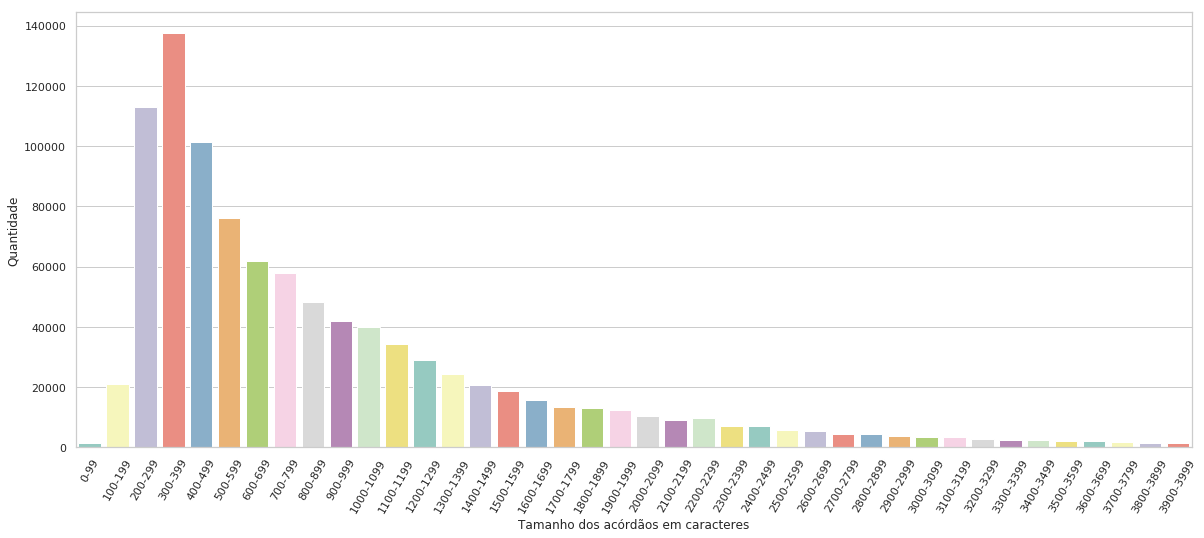

In [13]:
generate_count_graph(all_years_count)

In [14]:
# registers_len = 0
# for count in all_years_count.values():
#     registers_len += count
registers_len = 0
for count in all_count['quant'].tolist():
    registers_len += count

In [15]:
print('Total de acórdãos:', registers_len)

Total de acórdãos: 997483


In [16]:
def read_count(max=7000, min=0):
    count = []
    with open('data/len_count/acordaos_all_count.txt', 'r') as f:
        for val in f.readlines():
            num = int(val.replace('\n', ''))
            if num < max and num > min:
                count.append(num)

    return count

In [155]:
all_count_filtered = read_count(4000, 100)

In [156]:
def generate_histogram(all_count):
    plt.figure(figsize=(18, 8))
    chart = sns.distplot(all_count)
    sns.set(style='whitegrid')
    plt.xlabel('Tamanho da ementa em caracteres')
    plt.ylabel('Frequência')
    plt.savefig('histogram.png', format='png', dpi=150, bbox_inches='tight')

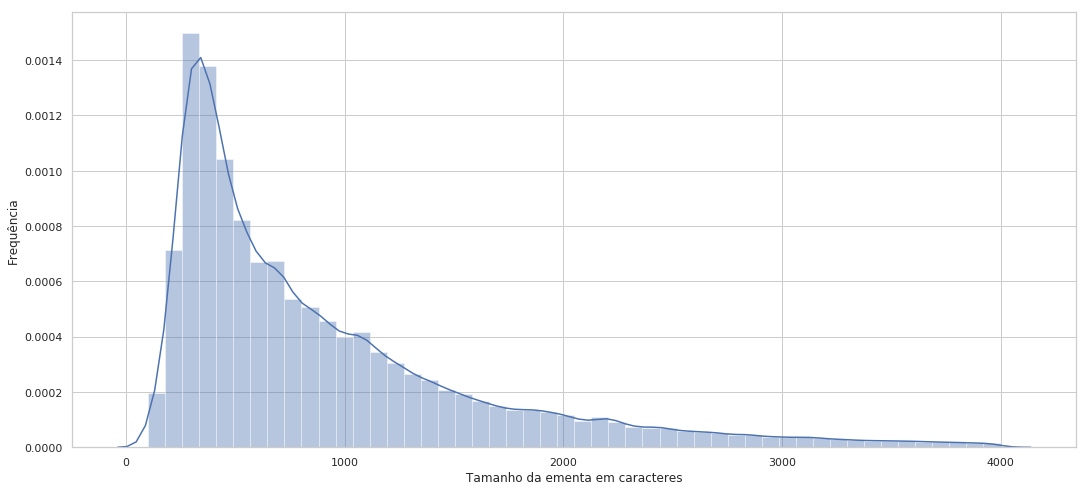

In [214]:
generate_histogram(all_count_filtered)

### Teste de distribuição da amostra

In [217]:
from scipy.stats import normaltest

In [219]:
stat, p = normaltest(read_count(35000, 0))
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=880472.717, p=0.000


In [220]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


### Diagrama de caixa

In [184]:
all_count_values = read_count(4000, 100)
all_count_values.sort()

In [199]:
from numpy import median, mean

In [186]:
len(all_count_values)

970666

In [204]:
print('Média:', mean(all_count_values))

Média: 905.6043541238696


In [205]:
median_q2 = median(all_count_values)
print('Mediana:', int(median_q2))

Mediana: 657


In [206]:
q1 = int(median(all_count_values[:485332]))
print('Q1:', q1)

Q1: 377


In [207]:
q3 = int(median(all_count_values[485333:]))
print('Q3:', q3)

Q3: 1184


In [208]:
i = q3 - q1
print('I:', i)

I: 807


In [209]:
pad = i * 1.5
pad

1210.5

In [210]:
min = all_count_values[0]
if (q1 - pad) > min:
    min = q1 - pad
print('Mínimo:', min)

Mínimo: 101


In [212]:
print('Máximo:', int(q3 + pad))

Máximo: 2394


In [213]:
def generate_boxplot(values):
    sns.set(style='whitegrid')
    plt.figure(figsize=(15, 5))
    chart = sns.boxplot(data=values, orient='h', fliersize=4, showmeans=True)
    plt.xlabel('Tamanho da ementa em caracteres')
    plt.ylabel('Ementas')
    plt.savefig('boxplot.png', format='png', dpi=150, bbox_inches='tight')

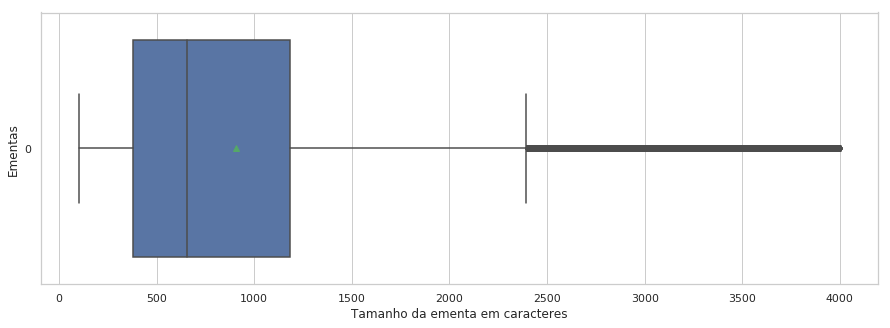

In [198]:
generate_boxplot(all_count_values)

In [223]:
most_registers = len(read_count(max=4000, min=0))

In [224]:
print('Total de acórdãos:', registers_len)
print('Acórdãos entre 200 e 4000 caracteres:', most_registers)
print(round((most_registers/registers_len) * 100, 2), '% dos dados estão nesta margem')

Total de acórdãos: 997483
Acórdãos entre 200 e 4000 caracteres: 972077
97.45 % dos dados estão nesta margem
